In [2]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

In [3]:
file_path = "D:/project/전국코로나데이터.csv"
corona_df = pd.read_csv(file_path, encoding='cp949')
corona_df

,일자,누적확진,신규확진,인구확진률,인구,누적사망,신규사망,사망률,누적 1차,누적백신,당일1차,당일2차,1차접종률,접종률,미접종자수
0,2022-05-23,17993985,26313,35.06,51329905,24006,19,0.13,45049534,44570419,471,732,87.76,86.83,6280371
1,2022-05-22,17967672,9975,35.00,51329905,23987,22,0.13,45049063,44569687,6,11,87.76,86.83,6280842
2,2022-05-21,17957697,19298,34.98,51329905,23965,54,0.13,45049057,44569676,530,772,87.76,86.83,6280848
3,2022-05-20,17938399,23442,34.95,51329905,23911,26,0.13,45048527,44568904,1138,1912,87.76,86.83,6281378
4,2022-05-19,17914957,25108,34.90,51329905,23885,43,0.13,45047389,44566992,508,842,87.76,86.82,6282516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2021-01-05,65818,839,0.13,51305184,1027,20,1.56,0,0,0,0,0.00,0.00,51305184
504,2021-01-04,64979,715,0.13,51305184,1007,26,1.55,0,0,0,0,0.00,0.00,51305184
505,2021-01-03,64264,1020,0.13,51305184,981,19,1.53,0,0,0,0,0.00,0.00,51305184
506,2021-01-02,63244,651,0.12,51305184,962,20,1.52,0,0,0,0,0.00,0.00,51305184


In [5]:
info_df = corona_df[['접종률','사망률','누적사망','인구확진률']]

In [7]:
cols = ['접종률', '사망률', '누적사망', '인구확진률']
corr = info_df[cols].corr(method = 'pearson')
corr

,접종률,사망률,누적사망,인구확진률
접종률,1.000000,-0.891382,0.653628,0.526652
사망률,-0.891382,1.000000,-0.777859,-0.705595
누적사망,0.653628,-0.777859,1.000000,0.978860
인구확진률,0.526652,-0.705595,0.978860,1.000000


In [8]:
corr.values
column_names = ['접종률', '사망률', '누적사망', '인구확진률']

c:\Users\cys97\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\cys97\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


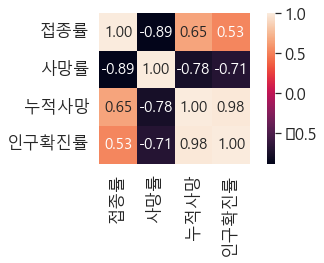

In [12]:


sns.set(font_scale=1.5)
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

hm = sns.heatmap(corr.values, #데이터
            cbar=True, #오른쪽 컬러 막대 출력 여부
            annot=True, #차트에 숫자를 보여줄 것인지 여부
            square=True, #차트를 정사각형으로 할 것인지
            fmt='.2f', #숫자의 출력 소수점 자리 개수 조절
            annot_kws={'size': 15}, #숫자 출력 시 숫자 크기 조절
            yticklabels=column_names, #y축에 컬럼명 출력
            xticklabels=column_names) #x축에 컬럼명 출력ㄴ

plt.tight_layout()
plt.show()

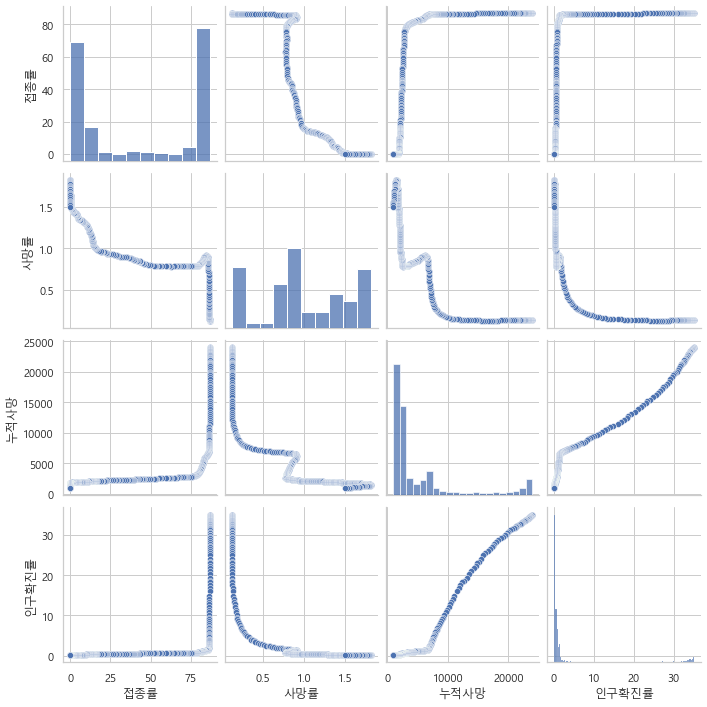

In [14]:
sns.set(style='whitegrid')
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
sns.pairplot(info_df[['접종률', '사망률', 
                     '누적사망', '인구확진률']])
plt.show()